In [78]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

In [80]:
os.chdir('C:\\Users\\mahes\\Downloads\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project')

In [221]:
geo=pd.read_csv('GEO_LOCATION.csv')
payment=pd.read_csv('ORDER_PAYMENTS.csv')
review=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
order=pd.read_csv('ORDERS.csv')
product=pd.read_csv('PRODUCTS.csv')
item=pd.read_csv('ORDER_ITEMS.csv')
seller=pd.read_csv('SELLERS.csv')
customer=pd.read_csv('CUSTOMERS.csv')



In [222]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [84]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [85]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [86]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [87]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [88]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [89]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [90]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# 1. Perform Detailed exploratory analysis 

### 1. a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)  

In [225]:
data=pd.merge(left=order,right=payment,how='inner',on='order_id')

In [227]:
data=pd.merge(left=data,right=customer,how='inner',on='customer_id')

In [229]:
data=pd.merge(left=data,right=item,how='left',on='order_id')

In [231]:
data=pd.merge(left=data,right=product,how='left',on='product_id')

In [233]:
data=pd.merge(left=data,right=seller,how='left',on='seller_id')

In [235]:
data=pd.merge(left=data,right=review,how='left',on='order_id')

In [236]:
data.shape

(119148, 37)

In [239]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2567
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weig

In [241]:
data=data.drop(columns=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_height_cm','product_width_cm','seller_city','seller_state','seller_zip_code_prefix'])

In [243]:
data.isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
payment_sequential             0
payment_type                   0
payment_installments           0
payment_value                  0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_item_id                833
product_id                   833
seller_id                    833
price                        833
freight_value                833
product_category_name       2567
review_id                      0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [245]:
data['order_item_id']=data['order_item_id'].fillna(data['order_item_id'].median())

In [247]:
col=['product_id','seller_id','product_category_name']
for i in col:
    data[i]=data[i].fillna('unknown')

In [249]:
data['price']=data['price'].fillna(0.90*(data['payment_value']))

In [251]:
data['freight_value']=data['freight_value'].fillna(0.10*(data['payment_value']))

In [253]:
data.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
review_id                   0
review_score                0
review_creation_date        0
review_answer_timestamp     0
dtype: int64

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119148 entries, 0 to 119147
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  119148 non-null  object 
 1   customer_id               119148 non-null  object 
 2   order_status              119148 non-null  object 
 3   order_purchase_timestamp  119148 non-null  object 
 4   payment_sequential        119148 non-null  int64  
 5   payment_type              119148 non-null  object 
 6   payment_installments      119148 non-null  int64  
 7   payment_value             119148 non-null  float64
 8   customer_unique_id        119148 non-null  object 
 9   customer_zip_code_prefix  119148 non-null  int64  
 10  customer_city             119148 non-null  object 
 11  customer_state            119148 non-null  object 
 12  order_item_id             119148 non-null  float64
 13  product_id                119148 non-null  o

In [257]:
data['order_purchase_timestamp']=pd.to_datetime(data.order_purchase_timestamp)

In [258]:
data['year']=data.order_purchase_timestamp.dt.year

In [261]:
data['month']=data.order_purchase_timestamp.dt.month_name()

In [263]:
data['week']=data.order_purchase_timestamp.dt.weekday

In [265]:
data['time']=data.order_purchase_timestamp.dt.time

In [267]:
data['days']=data.order_purchase_timestamp.dt.date

In [269]:
data['month_year']=data.order_purchase_timestamp.dt.date.astype(str).str[0:7]

In [271]:
data['price_to_pay']=data['price']+data['freight_value']

In [273]:
data.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
review_id                   0
review_score                0
review_creation_date        0
review_answer_timestamp     0
year                        0
month                       0
week                        0
time                        0
days                        0
month_year                  0
price_to_pay                0
dtype: int64

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119148 entries, 0 to 119147
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  119148 non-null  object        
 1   customer_id               119148 non-null  object        
 2   order_status              119148 non-null  object        
 3   order_purchase_timestamp  119148 non-null  datetime64[ns]
 4   payment_sequential        119148 non-null  int64         
 5   payment_type              119148 non-null  object        
 6   payment_installments      119148 non-null  int64         
 7   payment_value             119148 non-null  float64       
 8   customer_unique_id        119148 non-null  object        
 9   customer_zip_code_prefix  119148 non-null  int64         
 10  customer_city             119148 non-null  object        
 11  customer_state            119148 non-null  object        
 12  or

In [277]:
a=data.price_to_pay.sum()

In [279]:
print('The Total Revenue is:-',a)

The Total Revenue is:- 16807854.92


In [281]:
b=data.order_id.count()

In [283]:
print('The Total Order Quantity is:-', b)

The Total Order Quantity is:- 119148


In [285]:
c=data.product_id.nunique()

In [287]:
print('The Total no of product are:-', c)

The Total no of product are:- 32952


In [289]:
d=data.product_category_name.nunique()

In [291]:
print('The Total no of product category name are:-',d)

The Total no of product category name are:- 72


In [293]:
e=data.seller_id.nunique()

In [295]:
print('The Total no of seller are:-', e)

The Total no of seller are:- 3096


In [297]:
f=data.customer_zip_code_prefix.nunique()

In [299]:
print('The total location are:-', f)

The total location are:- 14994


In [301]:
g=data.payment_type.nunique()


In [303]:
print('The total no. of payment are:-',g)

The total no. of payment are:- 5


### b. Understanding how many new customers acquired every month 

In [306]:
a1=data.groupby(['order_id','customer_id']).last().reset_index()

In [307]:
customer_count=a1.groupby(['month_year',a1.customer_id.rename('customer')]).customer_id.count().reset_index()

In [308]:
customer_purchase=a1.groupby('customer_id').month_year.min().reset_index().rename(columns={'customer_id':'customer','month_year':'purchase_month'})

In [309]:
df=pd.merge(left=customer_count,right=customer_purchase,on='customer')

In [310]:
df.customer_id=np.where(df.month_year == df.purchase_month,'New','Old')

In [311]:
df

,month_year,customer,customer_id,purchase_month
0,2016-09,08c5351a6aca1c1589a38f244edeee9d,New,2016-09
1,2016-09,622e13439d6b5a0b486c435618b2679e,New,2016-09
2,2016-09,683c54fc24d40ee9f8a6fc179fd9856c,New,2016-09
3,2016-10,00474d2582fd72663036795b7ab8cfc1,New,2016-10
4,2016-10,01415cfeb907d8ce0e17075b4c097fe9,New,2016-10
...,...,...,...,...
99435,2018-09,fea4d57ed3a45455f89c25ef3dae8ee8,New,2018-09
99436,2018-10,4c2ec60c29d10c34bd49cb88aa85cfc4,New,2018-10
99437,2018-10,856336203359aa6a61bf3826f7d84c49,New,2018-10
99438,2018-10,a4b417188addbc05b26b72d5e44837a1,New,2018-10


In [312]:
a=df.groupby('month_year').customer_id.count().reset_index()

In [313]:
print('The total No. of New Customer aquired by company by each month are:-')
print(a)

The total No. of New Customer aquired by company by each month are:-
   month_year  customer_id
0     2016-09            3
1     2016-10          324
2     2016-12            1
3     2017-01          800
4     2017-02         1780
5     2017-03         2682
6     2017-04         2404
7     2017-05         3700
8     2017-06         3245
9     2017-07         4026
10    2017-08         4331
11    2017-09         4285
12    2017-10         4631
13    2017-11         7544
14    2017-12         5673
15    2018-01         7269
16    2018-02         6728
17    2018-03         7211
18    2018-04         6939
19    2018-05         6873
20    2018-06         6167
21    2018-07         6292
22    2018-08         6512
23    2018-09           16
24    2018-10            4


### c. Understand the retention of customers on month on month basis 

In [316]:
s=data.customer_id.nunique()

In [318]:
print('The NO. of retention of customers on month on month basis are:-', s)

The NO. of retention of customers on month on month basis are:- 99440


### d. How the revenues from existing/new customers on month on month basis 

In [ ]:
sns.barplot(data.month_year,data.payment_value)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc… 

In [ ]:
data.head(2)

In [322]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_category_name',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'year', 'month', 'week', 'time', 'days',
       'month_year', 'price_to_pay'],
      dtype='object')

In [324]:
month_sales=data.groupby(['month'])[['payment_value']].sum().reset_index()

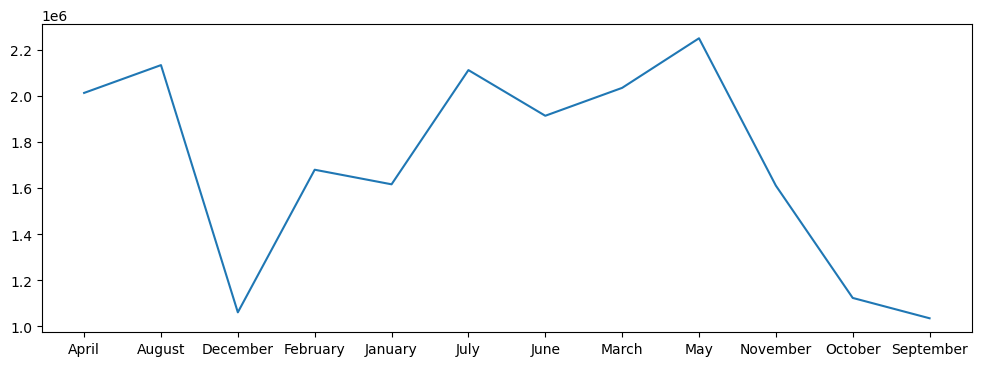

In [326]:
plt.figure(figsize=(12,4))
plt.plot(month_sales['month'],month_sales['payment_value'],label='trend_monthly_sales')

In [328]:
category_sales=data.groupby(['month','product_category_name'])['order_item_id'].count().reset_index()

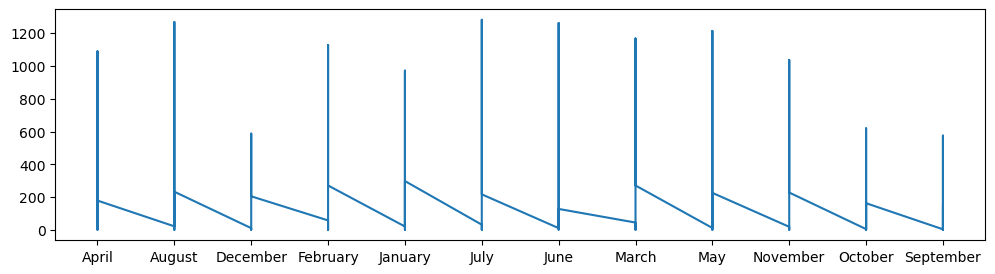

In [330]:
plt.figure(figsize=(12,3))
plt.plot(category_sales['month'],category_sales['order_item_id'],label='Trend_line_category_sales')

In [332]:
Sales_customer=data.groupby(['customer_state'])['payment_value'].sum().reset_index()

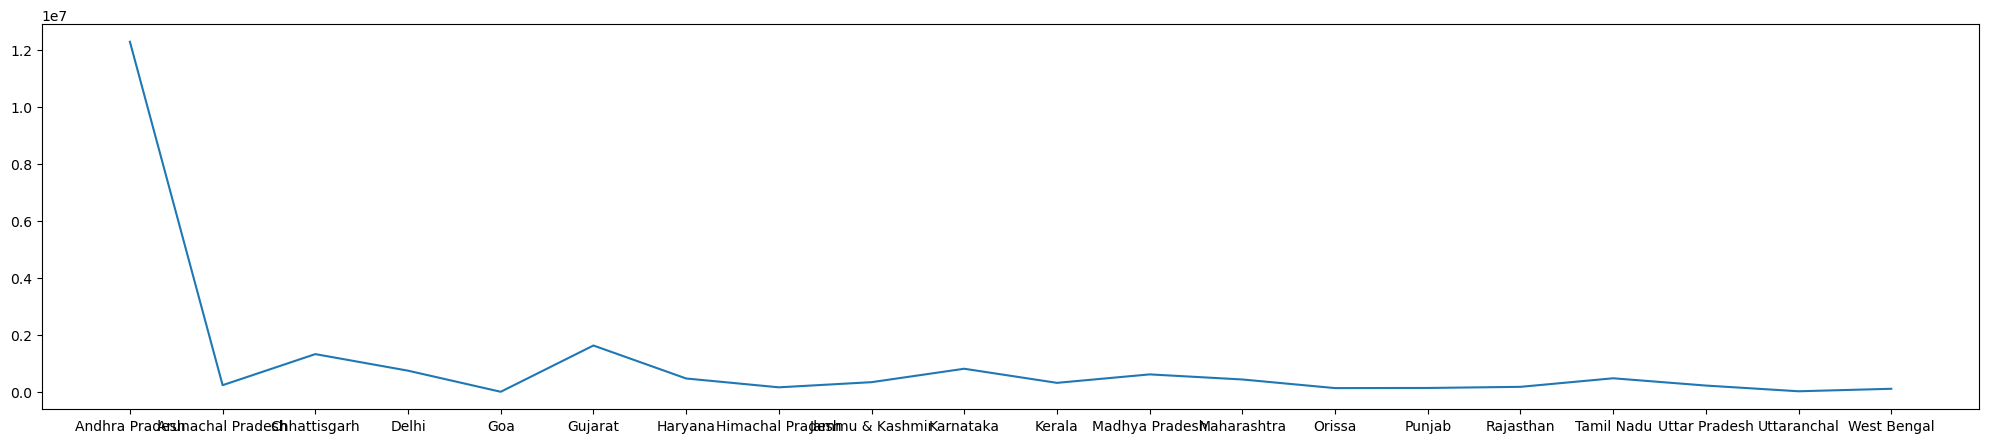

In [334]:
plt.figure(figsize=(25,5))
plt.plot(Sales_customer['customer_state'],Sales_customer['payment_value'],label='Trend_line_sales_customer_by_each_state')

In [336]:
payment_type=data.groupby(['payment_type'])['payment_value'].sum().reset_index()

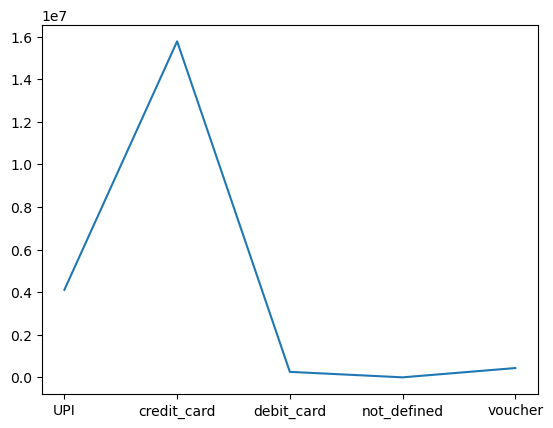

In [338]:
plt.plot(payment_type['payment_type'],payment_type['payment_value'],label='line_trend_of_payment_type')

### f. Popular Products by month, seller, state, category. 

In [341]:
k=data.groupby(['month'])[['product_category_name']].count().reset_index()

In [343]:
print('The popular product of each month are:-')
print(k)

The popular product of each month are:-
        month  product_category_name
0       April                  11156
1      August                  12802
2    December                   6648
3    February                  10183
4     January                   9690
5        July                  12325
6        June                  11256
7       March                  11858
8         May                  12743
9    November                   9191
10    October                   6089
11  September                   5207


In [345]:
l=data.groupby(['seller_id'])['product_category_name'].count().reset_index().sort_values(by='product_category_name')

In [347]:
print('The popular seller are :-')
print(l)

The popular seller are :-
                             seller_id  product_category_name
1547  7d81e74a4755b552267cd5e081563028                      1
524   2c538755f1ca9540af144f266e70df6c                      1
526   2c9005d8043aff18b8557ffb7b13cda4                      1
1918  9d69ba0a7a626a64dc5db08e529559cf                      1
1905  9c57bc60cfad5ee62d35d3f1ce4593a1                      1
...                                ...                    ...
2643  da8622b14eb17ae2831f4ac5b9dab84a                   1662
2481  cc419e0650a3c5ba77189a1882b7556a                   1893
368   1f50f920176fa81dab994f9023523100                   2017
1235  6560211a19b47992c3666cc44a7e94c0                   2130
881   4a3ca9315b744ce9f8e9374361493884                   2155

[3096 rows x 2 columns]


In [349]:
m=data.groupby(['customer_state'])['product_category_name'].count().reset_index()

In [351]:
print('The popular customer location:-')
print(m)

The popular customer location:-
       customer_state  product_category_name
0      Andhra Pradesh                  73302
1   Arunachal Pradesh                   1328
2        Chhattisgarh                   7480
3               Delhi                   3957
4                 Goa                     10
5             Gujarat                   8949
6             Haryana                   2664
7    Himachal Pradesh                    870
8     Jammu & Kashmir                   1839
9           Karnataka                   4595
10             Kerala                   1794
11     Madhya Pradesh                   3410
12        Maharashtra                   2340
13             Orissa                    701
14             Punjab                    777
15          Rajasthan                    926
16         Tamil Nadu                   2477
17      Uttar Pradesh                   1188
18        Uttaranchal                    110
19        West Bengal                    431


### g. Popular categories by state, month

In [358]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_category_name',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'year', 'month', 'week', 'time', 'days',
       'month_year', 'price_to_pay'],
      dtype='object')

In [380]:
pd.pivot_table(data=data,index=['customer_state'],columns=['product_category_name'],aggfunc='count')

customer_city                          \
product_category_name Agro_Industry_And_Commerce Air_Conditioning    Art   
customer_state                                                             
Andhra Pradesh                             177.0            213.0  145.0   
Arunachal Pradesh                            1.0              1.0    4.0   
Chhattisgarh                                17.0             12.0   17.0   
Delhi                                        5.0             10.0   12.0   
Goa                                          NaN              NaN    NaN   
Gujarat                                     15.0             20.0    9.0   
Haryana                                      5.0              6.0    5.0   
Himachal Pradesh                             NaN              2.0    1.0   
Jammu & Kashmir                              3.0              2.0    NaN   
Karnataka                                    5.0              8.0    7.0   
Kerala                                       4.0              5.0    4.0   
Madhya Pradesh                               9.0              8.0    4.0   
Maharashtra                                  2.0              4.0    1.0   
Orissa                                       NaN              1.0    1.0   
Punjab                                       1.0              NaN    3.0   
Rajasthan                                    NaN              5.0    2.0   
Tamil Nadu                                   6.0              5.0    3.0   
Uttar Pradesh                                NaN              NaN    1.0   
Uttaranchal                                  NaN              NaN    NaN   
West Bengal                                  2.0              NaN    NaN   

                                                                    \
product_category_name Arts_And_Craftmanship  Audio    Auto    Baby   
customer_state                                                       
Andhra Pradesh                         17.0  254.0  2418.0  1974.0   
Arunachal Pradesh                       NaN    1.0    51.0    43.0   
Chhattisgarh                            1.0   24.0   307.0   204.0   
Delhi                                   2.0   13.0   169.0    95.0   
Goa                                     NaN    NaN     1.0     NaN   
Gujarat                                 2.0   22.0   366.0   260.0   
Haryana                                 NaN   11.0   111.0    59.0   
Himachal Pradesh                        NaN    1.0    34.0    27.0   
Jammu & Kashmir                         1.0    3.0    70.0    43.0   
Karnataka                               NaN    8.0   225.0   148.0   
Kerala                                  NaN    8.0    89.0    45.0   
Madhya Pradesh                          NaN   11.0   144.0    75.0   
Maharashtra                             NaN    6.0   110.0    57.0   
Orissa                                  NaN    2.0    35.0    13.0   
Punjab                                  NaN    NaN    30.0    14.0   
Rajasthan                               NaN    2.0    48.0    15.0   
Tamil Nadu                              NaN    6.0   104.0    67.0   
Uttar Pradesh                           1.0    6.0    66.0    44.0   
Uttaranchal                             NaN    2.0     2.0     2.0   
West Bengal                             NaN    1.0    20.0    19.0   

                                                                            \
product_category_name Bed_Bath_Table Books_General_Interest Books_Imported   
customer_state                                                               
Andhra Pradesh                7736.0                  334.0           42.0   
Arunachal Pradesh              128.0                    7.0            4.0   
Chhattisgarh                   733.0                   40.0            4.0   
Delhi                          314.0                   36.0            1.0   
Goa                              NaN                    NaN            NaN   
Gujarat                        808.0               

In [406]:
o=data.groupby(['customer_state'])['product_category_name'].count().reset_index()

In [408]:
print('The Popular categories by state are:-')
print(o)

The Popular categories by state are:-
       customer_state  product_category_name
0      Andhra Pradesh                  73302
1   Arunachal Pradesh                   1328
2        Chhattisgarh                   7480
3               Delhi                   3957
4                 Goa                     10
5             Gujarat                   8949
6             Haryana                   2664
7    Himachal Pradesh                    870
8     Jammu & Kashmir                   1839
9           Karnataka                   4595
10             Kerala                   1794
11     Madhya Pradesh                   3410
12        Maharashtra                   2340
13             Orissa                    701
14             Punjab                    777
15          Rajasthan                    926
16         Tamil Nadu                   2477
17      Uttar Pradesh                   1188
18        Uttaranchal                    110
19        West Bengal                    431


In [400]:
p=data.groupby(['month'])['product_category_name'].count().reset_index()

In [410]:
print('The Popular Categories by month are:-')
print(p)

The Popular Categories by month are:-
        month  product_category_name
0       April                  11156
1      August                  12802
2    December                   6648
3    February                  10183
4     January                   9690
5        July                  12325
6        June                  11256
7       March                  11858
8         May                  12743
9    November                   9191
10    October                   6089
11  September                   5207


### h. List top 10 most expensive products sorted by price 

In [421]:
r=data.groupby(['product_category_name'])['payment_value'].sum().sort_values(ascending=False)

In [425]:
r1=r.head(10)

In [427]:
print('The top  10 Most expensive products are:-')
print(r1)

The top  10 Most expensive products are:-
product_category_name
Bed_Bath_Table           1744205.53
Health_Beauty            1663076.30
Computers_Accessories    1599574.66
Furniture_Decor          1444383.69
Watches_Gifts            1430553.48
Sports_Leisure           1400270.11
Housewares               1097900.09
Auto                      855095.68
Garden_Tools              840721.59
Cool_Stuff                781933.97
Name: payment_value, dtype: float64


# 2. Performing Customers/sellers Segmentation 


### a. Divide the customers into groups based on the revenue generated  

In [433]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_category_name',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'year', 'month', 'week', 'time', 'days',
       'month_year', 'price_to_pay'],
      dtype='object')

In [441]:
data['revenue']=data['price']*data['order_item_id']

In [454]:
s=data.groupby(['customer_id'])['revenue'].sum().reset_index()

In [458]:
print('The No of customer based on the revenue generated by them are:-')
print(s)

The No of customer based on the revenue generated by them are:-
                            customer_id  revenue
0      00012a2ce6f8dcda20d059ce98491703   89.800
1      000161a058600d5901f007fab4c27140   54.900
2      0001fd6190edaaf884bcaf3d49edf079  179.990
3      0002414f95344307404f0ace7a26f1d5  149.900
4      000379cdec625522490c315e70c7a9fb   93.000
...                                 ...      ...
99435  fffecc9f79fd8c764f843e9951b11341  164.700
99436  fffeda5b6d849fbd39689bb92087f431   47.900
99437  ffff42319e9b2d713724ae527742af25  199.900
99438  ffffa3172527f765de70084a7e53aae8   32.700
99439  ffffe8b65bbe3087b653a978c870db99   16.533

[99440 rows x 2 columns]


### b. Divide the sellers into groups based on the revenue generated 

In [452]:
q=data.groupby(['seller_id'])['revenue'].sum().reset_index()

In [461]:
print('The No of seller based on the revenue generated by them are:-')
print(q)


The No of seller based on the revenue generated by them are:-
                             seller_id     revenue
0     0015a82c2db000af6aaaf3ae2ecb0532    2685.000
1     001cca7ae9ae17fb1caed9dfb1094831   30781.320
2     001e6ad469a905060d959994f1b41e4f     250.000
3     002100f778ceb8431b7a1020ff7ab48f    1404.500
4     003554e2dce176b5555353e4f3555ac8     120.000
...                                ...         ...
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3    2418.400
3092  ffeee66ac5d5a62fe688b9d26f83f534    1839.860
3093  fffd5413c0700ac820c7069d66d98c89    9851.600
3094  ffff564a4f9085cd26170f4732393726    1426.300
3095                           unknown  146539.323

[3096 rows x 2 columns]


# 3. Cross-Selling (Which products are selling together) 

In [475]:
cross_selling=data.groupby(['customer_id']).agg({'product_category_name':list}).assign(count=lambda X:X['product_category_name'].str.len())

In [481]:
cross_selling.sort_values(by='count', ascending = False).head(10)

,product_category_name,count
customer_id,,
270c23a11d024a44c896d1894b261a83,"[Bed_Bath_Table, Bed_Bath_Table, Housewares, B...",63
13aa59158da63ba0e93ec6ac2c07aacb,"[Office_Furniture, Office_Furniture, Office_Fu...",38
9af2372a1e49340278e7c1ef8d749f34,"[Garden_Tools, Garden_Tools, Garden_Tools, Gar...",29
92cd3ec6e2d643d4ebd0e3d6238f69e2,"[Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Tabl...",26
d22f25a9fadfb1abbc2e29395b1239f4,"[Computers_Accessories, Computers_Accessories,...",24
86cc80fef09f7f39df4b0dbce48e81cb,"[Computers_Accessories, Luggage_Accessories, C...",24
2ba91e12e5e4c9f56b82b86d9031d329,"[Perfumery, Perfumery, Perfumery, Perfumery, P...",24
63b964e79dee32a3587651701a2b8dbf,"[Agro_Industry_And_Commerce, Agro_Industry_And...",24
6ee2f17e3b6c33d6a9557f280edd2925,"[Garden_Tools, Garden_Tools, Garden_Tools, Gar...",24


# 4. Payment Behaviour 

### a. How customers are paying? 

In [497]:
m=data.groupby('payment_type')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)

In [499]:
print(m)

  payment_type  customer_id
1  credit_card        87784
0          UPI        23190
4      voucher         6465
2   debit_card         1706
3  not_defined            3


### b. Which payment channels are used by most customers?

In [502]:
print('Customers are mostly paying via Credit Card and UPI')

Customers are mostly paying via Credit Card and UPI


# 5. Customer satisfaction towards category & product 

### a. Which categories (top 10) are maximum rated & minimum rated? 

In [518]:
h=data.groupby(['product_category_name'])['review_score'].count().sort_values(ascending=False)

In [520]:
h.head(10)

product_category_name
Bed_Bath_Table           11990
Health_Beauty            10030
Sports_Leisure            9005
Furniture_Decor           8833
Computers_Accessories     8151
Housewares                7380
Watches_Gifts             6213
Telephony                 4726
Garden_Tools              4590
Auto                      4400
Name: review_score, dtype: int64

### b. Which products (top10) are maximum rated & minimum rated? 

In [522]:
h.tail(10)

product_category_name
Music                        40
Diapers_And_Hygiene          39
Flowers                      33
Fashion_Sport                31
Home_Comfort_2               31
Arts_And_Craftmanship        24
La_Cuisine                   16
Cds_Dvds_Musicals            14
Fashion_Childrens_Clothes     8
Security_And_Services         2
Name: review_score, dtype: int64

### c. Average rating by location, seller, product, category, month etc. 

In [528]:
y=data.groupby(['seller_id'])['review_score'].mean().sort_values(ascending=False)

In [530]:
print('The Average rating of seller by rating scores are:-')
print(y)

The Average rating od seller by rating scores are:-
seller_id
c18309219e789960add0b2255ca4b091    5.0
2075d8cd4dd63ff12df0749a5866bb06    5.0
40ec8ab6cdafbcc4f544da38c67da39a    5.0
4125d9385a25e82d2f72d3a0fd55bc3f    5.0
417a1e6c7321084d2a0ae0d023cfad93    5.0
                                   ... 
63bc58679c44e8a998792119fd7ad23e    1.0
df683dfda87bf71ac3fc63063fba369d    1.0
1fa2d3def6adfa70e58c276bb64fe5bb    1.0
6576fd3e23c88f0e5d4d23f39bba0542    1.0
61b893c57e33626afb104d4112b1be76    1.0
Name: review_score, Length: 3096, dtype: float64


In [540]:
x=data.groupby(['product_id'])['review_score'].mean().sort_values(ascending=False)

In [542]:
print('The Average rating of product by rating scores are:-')
print(x)

The Average rating of product by rating scores are:-
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
5f728acb77ac6cfbe96f6c64d2bd4694    5.0
5f2ad53b751662e4c54dceffadb3804d    5.0
5f2bbb2425de4f4853839fd12fc87d6e    5.0
c5dfa757c5ae7662e178e990e39362e0    5.0
                                   ... 
3560cb23f7a6760dc967498e22caa460    1.0
1a9d5623d718be92f3d696bfd261bb4f    1.0
ef4f75a1e1266944f1733179e963d4be    1.0
de7e97827841985dae27ef4c4769da95    1.0
f2d3be8d725ab19aae58ceb837f57897    1.0
Name: review_score, Length: 32952, dtype: float64


In [546]:
z=data.groupby(['product_category_name'])['review_score'].mean().sort_values(ascending=False)

In [548]:
print('The Average rating of product category by rating scores are:-')
print(z)

The Average rating of product category by rating scores are:-
product_category_name
Cds_Dvds_Musicals            4.642857
Fashion_Childrens_Clothes    4.500000
Books_General_Interest       4.431858
Books_Imported               4.419355
Books_Technical              4.345588
                               ...   
Office_Furniture             3.516779
Home_Comfort_2               3.387097
Diapers_And_Hygiene          3.256410
unknown                      3.139462
Security_And_Services        2.500000
Name: review_score, Length: 72, dtype: float64


In [552]:
i=data.groupby(['month'])['review_score'].mean().sort_values(ascending=False)

In [554]:
print('The Average rating of per month by rating scores are:-')
print(i)

The Average rating of per month by rating scores are:-
month
August       4.186690
July         4.152211
June         4.149254
May          4.106411
September    4.093528
April        4.033525
October      3.974052
January      3.927967
December     3.909446
November     3.801219
March        3.771125
February     3.770991
Name: review_score, dtype: float64


In [560]:
c=data.groupby(['customer_city'])['review_score'].mean().sort_values(ascending=False)

In [562]:
print('The Average rating of customer city by rating scores are:-')
print(c)

The Average rating of customer city by rating scores are:-
customer_city
Bharthana            5.0
Chamoli Gopeshwar    5.0
Tiruppur             5.0
Fariha               5.0
Kollankodu           5.0
                    ... 
Khandapada           1.0
Sahapur              1.0
Velur                1.0
Kerakat              1.0
Vettaikaranpudur     1.0
Name: review_score, Length: 4119, dtype: float64


In [566]:
s=data.groupby(['customer_state'])['review_score'].mean().sort_values(ascending=False)

In [568]:
print('The Average rating of customer state by rating scores are:-')
print(s)

The Average rating of customer state by rating scores are:-
customer_state
Goa                  4.800000
Punjab               4.150579
Uttar Pradesh        4.119529
Tamil Nadu           4.100121
Rajasthan            4.091793
Haryana              4.087087
Orissa               4.079886
Maharashtra          4.072222
Kerala               4.034560
Gujarat              4.021790
Delhi                4.017690
Chhattisgarh         4.015241
Arunachal Pradesh    4.009036
Karnataka            4.000435
Jammu & Kashmir      3.989125
West Bengal          3.988399
Andhra Pradesh       3.979578
Himachal Pradesh     3.974713
Madhya Pradesh       3.969208
Uttaranchal          3.718182
Name: review_score, dtype: float64
